In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv('tennis_stats.csv')

In [3]:
df

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,...,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,...,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,...,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,...,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264


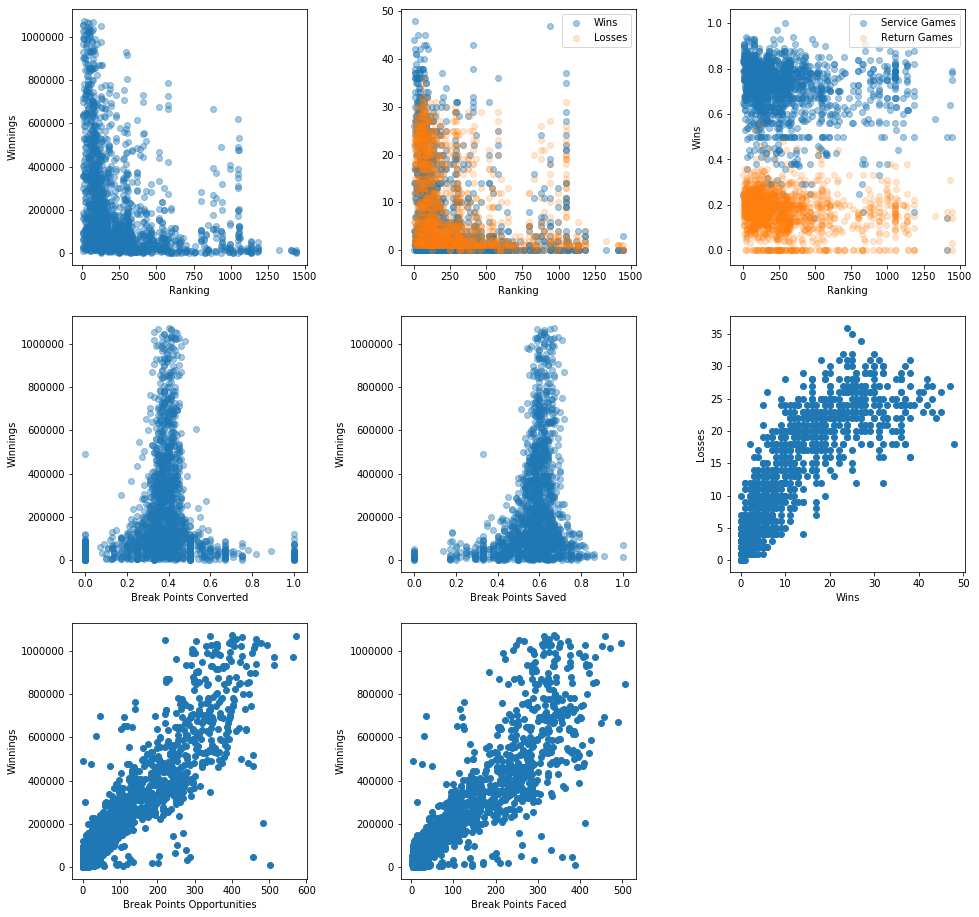

In [4]:
plt.figure(figsize=(16,16))

plt.subplot(331)
plt.scatter(df.Ranking, df.Winnings, alpha=0.4)
plt.xlabel('Ranking')
plt.ylabel('Winnings')

plt.subplot(332)
plt.scatter(df.Ranking, df.Wins, alpha=0.4)
plt.scatter(df.Ranking, df.Losses, alpha=0.2)
plt.legend(['Wins', 'Losses'])
plt.xlabel('Ranking')

plt.subplot(333)
plt.scatter(df.Ranking, df.ServiceGamesWon, alpha=0.4)
plt.scatter(df.Ranking, df.ReturnGamesWon, alpha=0.2)
plt.legend(['Service Games', 'Return Games'])
plt.xlabel('Ranking')
plt.ylabel('Wins')

plt.subplot(334)
plt.scatter(df.BreakPointsConverted, df.Winnings, alpha=0.4)
plt.xlabel('Break Points Converted')
plt.ylabel('Winnings')

plt.subplot(335)
plt.scatter(df.BreakPointsSaved, df.Winnings, alpha=0.4)
plt.xlabel('Break Points Saved')
plt.ylabel('Winnings')

plt.subplot(336)
plt.scatter(df.Wins, df.Losses)
plt.xlabel('Wins')
plt.ylabel('Losses')

plt.subplot(337)
plt.scatter(df.BreakPointsOpportunities, df.Winnings)
plt.xlabel('Break Points Opportunities')
plt.ylabel('Winnings')

plt.subplot(338)
plt.scatter(df.BreakPointsFaced, df.Winnings)
plt.xlabel('Break Points Faced')
plt.ylabel('Winnings')

plt.subplots_adjust(wspace=0.4)
plt.show()

# Exploratory Analysis:
## Rankings
A higher (lower numbered) ranking meant more winnings, as well as more games played.
## Wins and Losses
Wins and losses seemed fairly even with each other, indicating that match-ups were also evenly done and quantity of wins/losses was less important than who the match was against.
## Break Points
- More Break Points Opportunities and Break Points Faced meant more winnings. I wonder if this is less about the opportunities and more about the sheer number of games played by higher ranked players.
- Break Points Converted (defensive) trended towards 40%, with higher earnings at this frequency.
- Break Points Saved (offensive) trended towards 60%, with higher earnings at this frequency.

In [5]:
top_players = df[df.Ranking <= 10][['Player', 'Year', 'Ranking']].sort_values(by='Ranking').reset_index()
top_players

,index,Player,Year,Ranking
0,1510,Marin Cilic,2011,3
1,1332,Marin Cilic,2013,3
2,1720,Alexander Zverev,2013,4
3,1460,Alexander Zverev,2014,4
4,735,Alexander Zverev,2015,4
5,783,Grigor Dimitrov,2009,5
6,590,Grigor Dimitrov,2015,5
7,583,Grigor Dimitrov,2012,5
8,562,Grigor Dimitrov,2013,5
9,839,Grigor Dimitrov,2011,5


Interestingly, this data is not complete. It must be a sample rather than the full population.

# Let's look into winnings by year

In [6]:
winnings_by_year = df[['Year', 'Winnings']]

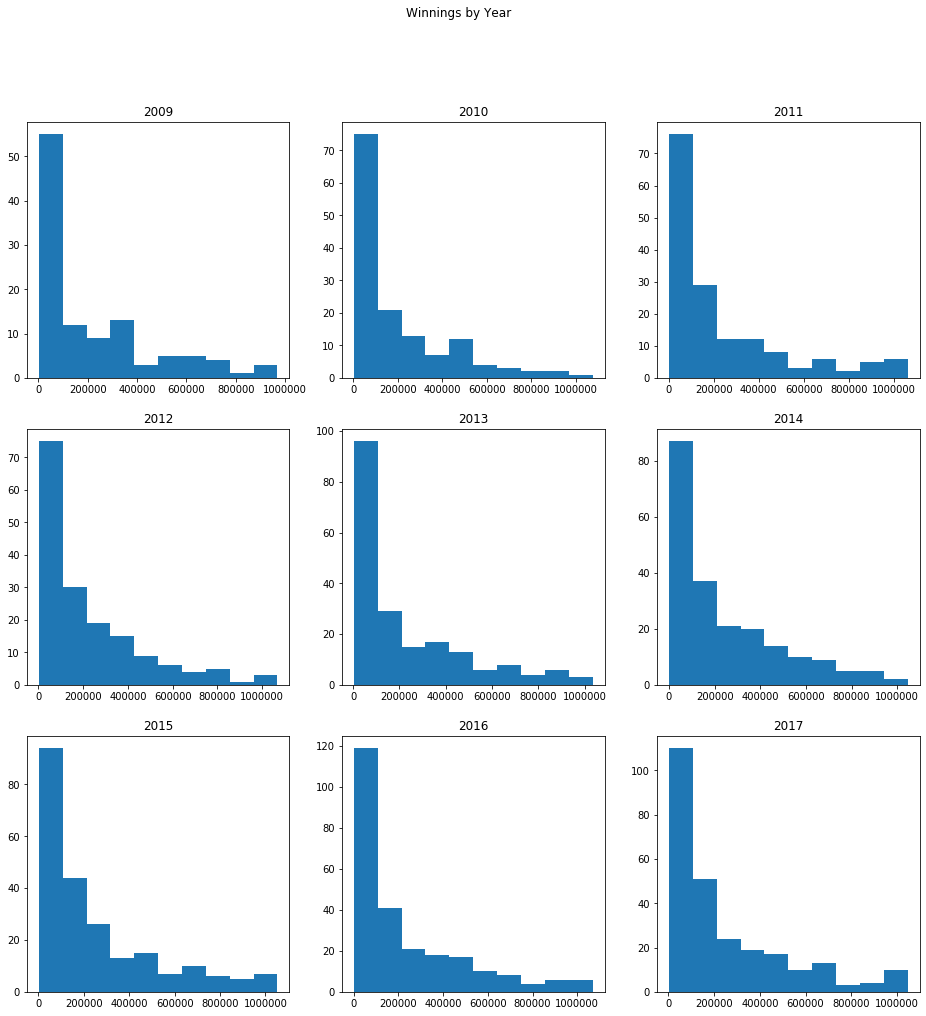

In [7]:
plt.figure(figsize=(16,16))
plt.suptitle('Winnings by Year')

plot_index = 1

for i in range(2009,2018):
    plt.subplot(3,3,plot_index)
    plt.hist(winnings_by_year[winnings_by_year['Year'] == i]['Winnings'])
    plt.title(str(i))
    
    plot_index += 1

plt.show()

In [8]:
median_yearly_winnings = winnings_by_year.groupby('Year').mean().reset_index()
median_yearly_winnings

,Year,Winnings
0,2009,219542.327273
1,2010,200701.550000
2,2011,234688.477987
3,2012,223022.874251
4,2013,230250.238579
5,2014,241639.733333
6,2015,249975.524229
7,2016,234192.784000
8,2017,250412.233716


I chose median winnings rather than mean winnings because all of the histograms are right-skew.

In [9]:
years = np.array(range(2009,2018))
years = years.reshape(-1, 1)

median_winnings = np.array(median_yearly_winnings.Winnings)
median_winnings = median_winnings.reshape(-1,1)

winnings_lr = LinearRegression()
winnings_fit = winnings_lr.fit(years, median_winnings)

future_years = np.array(range(2009,2021))
future_years = future_years.reshape(-1,1)
future_winnings = winnings_lr.predict(future_years)

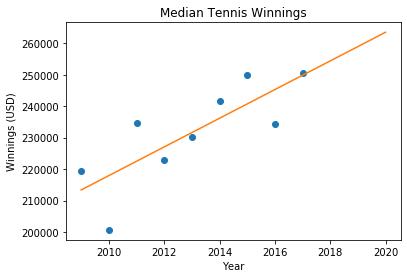

In [10]:
plt.plot(median_yearly_winnings.Year, median_yearly_winnings.Winnings, 'o')
plt.plot(future_years, future_winnings)
plt.title('Median Tennis Winnings')
plt.xlabel('Year')
plt.ylabel('Winnings (USD)')
plt.show()

Of course, the prediction for 2020 isn't applicable because of COVID-19, but it's nice to dream, isn't it?

Just out of curiosity, how much would the median winnings be if we WEREN'T in the middle of a global pandemic?

In [11]:
print(f'The predicted median winnings for 2020 were ${round(future_winnings[-1,0],2)}.')

The predicted median winnings for 2020 were $263469.69.


# Does total number of games played affect ranking?
First, I'll pull the related columns from df and make a total games column.

In [12]:
games_count_df = df[['Year', 'Wins', 'Losses', 'Ranking']].reset_index()
games_count_df['Total'] = games_count_df['Wins'] + games_count_df['Losses']
games_count_df

,index,Year,Wins,Losses,Ranking,Total
0,0,2016,1,2,119,3
1,1,2017,0,1,381,1
2,2,2017,4,1,119,5
3,3,2010,0,0,125,0
4,4,2017,0,1,272,1
...,...,...,...,...,...,...
1716,1716,2010,0,1,1062,1
1717,1717,2012,16,20,831,36
1718,1718,2012,0,1,628,1
1719,1719,2011,0,1,264,1


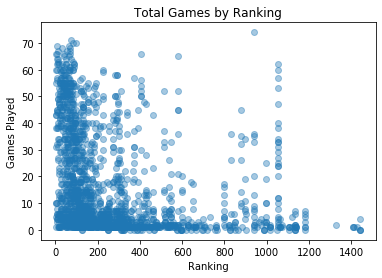

In [13]:
plt.scatter(games_count_df['Ranking'], games_count_df['Total'], alpha=0.4)
plt.title('Total Games by Ranking')
plt.xlabel('Ranking')
plt.ylabel('Games Played')
plt.show()

It definitely seems like there are fewer games played by poorly-ranked players, but more successful players are all over the board. What if I isolate the top 100 players?

In [14]:
games_count_top_100 = games_count_df[games_count_df['Ranking'] <= 100].reset_index()
games_count_top_100

,level_0,index,Year,Wins,Losses,Ranking,Total
0,12,12,2011,0,1,91,1
1,27,27,2013,0,1,100,1
2,31,31,2013,26,22,16,48
3,35,35,2013,1,5,15,6
4,48,48,2009,2,6,8,8
...,...,...,...,...,...,...,...
546,1674,1674,2009,0,2,43,2
547,1678,1678,2013,2,1,85,3
548,1687,1687,2011,1,3,7,4
549,1715,1715,2009,0,1,87,1


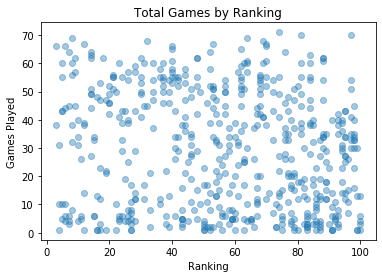

In [15]:
plt.scatter(games_count_top_100['Ranking'], games_count_top_100['Total'], alpha=0.4)
plt.title('Total Games by Ranking')
plt.xlabel('Ranking')
plt.ylabel('Games Played')
plt.show()

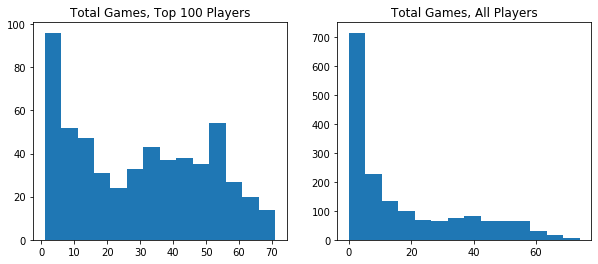

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(games_count_top_100['Total'], bins=14)
plt.title('Total Games, Top 100 Players')

plt.subplot(122)
plt.hist(games_count_df['Total'], bins=14)
plt.title('Total Games, All Players')
plt.show()

While players of all rankings are significantly more likely to have played fewer than ten games per season, the bimodal histogram for the top 100 players indicates that a large portion of the top players participated in 35-55 games per season. The total games played did not demonstrate a trend among top players. Rather, the higher game count was evenly distributed among the top 100 players.

I'm curious if there is a discrepancy in years.

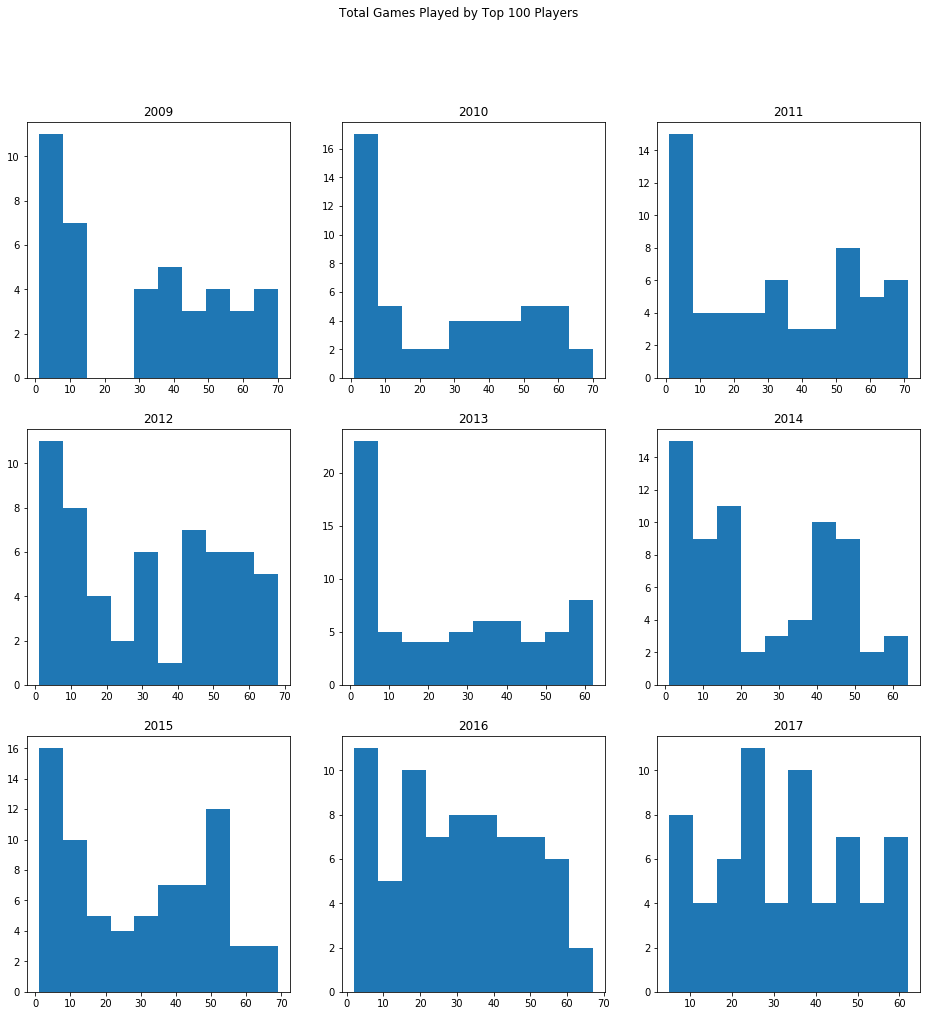

In [17]:
plt.figure(figsize=(16,16))
plt.suptitle('Total Games Played by Top 100 Players')

plot_index = 1
for i in range(2009,2018):
    plt.subplot(3,3,plot_index)
    plt.hist(games_count_top_100[games_count_top_100['Year'] == i]['Total'])
    plt.title(str(i))
    
    plot_index += 1

plt.show()

Something was definitely going on in 2016. Let's check the relationship between ranking and games played by year.

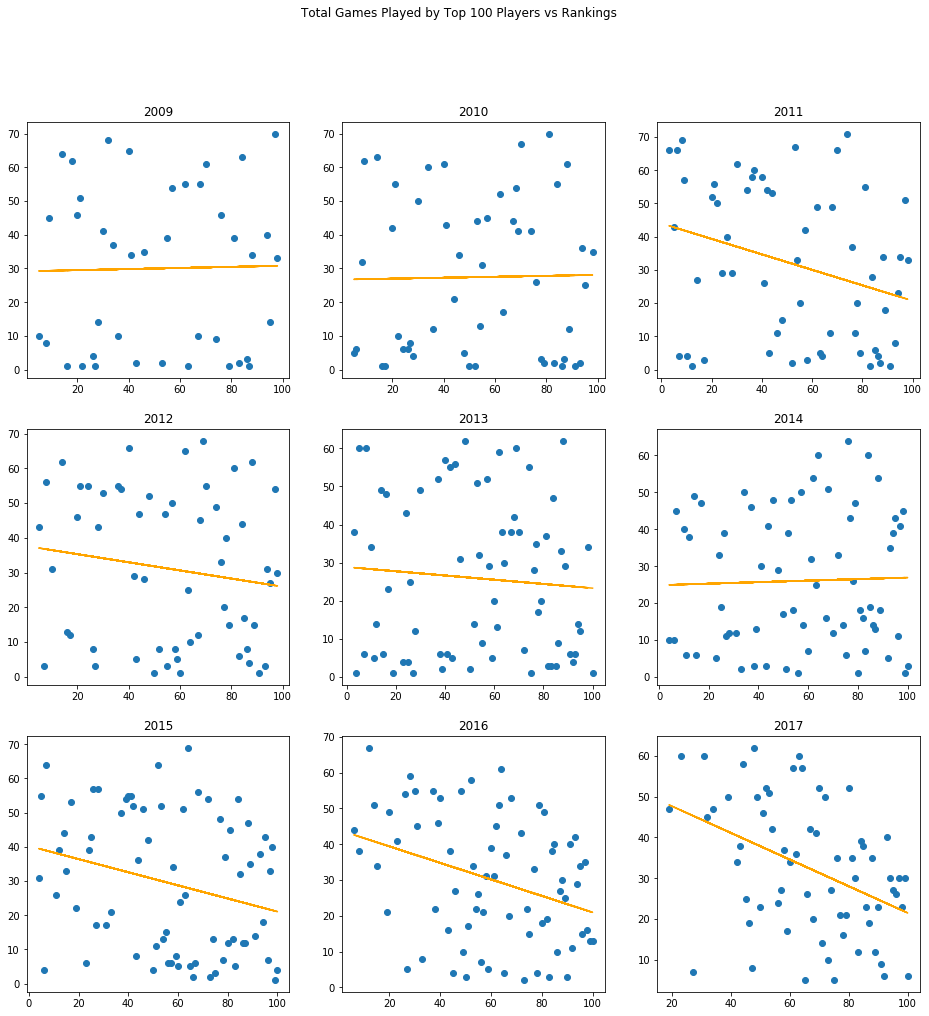

In [18]:
plt.figure(figsize=(16,16))
plt.suptitle('Total Games Played by Top 100 Players vs Rankings')

plot_index = 1
for i in range(2009,2018):
    ranking = np.array(games_count_top_100[games_count_top_100['Year'] == i]['Ranking']).reshape(-1,1)
    total = np.array(games_count_top_100[games_count_top_100['Year'] == i]['Total']).reshape(-1,1)
    total_lr = LinearRegression()
    total_fit = total_lr.fit(ranking, total)
    total_predict = total_lr.predict(ranking)

    plt.subplot(3,3,plot_index)
    plt.scatter(games_count_top_100[games_count_top_100['Year'] == i]['Ranking'],
                games_count_top_100[games_count_top_100['Year'] == i]['Total'])
    plt.plot(ranking, total_predict, color='orange')
    plt.title(str(i))
    
    plot_index += 1


plt.show()

Except in 2009, 2010, and 2014, there is a trend towards more games for better-ranked tennis players. The line of best fit for each scatter plot has a much lower slope for the years 2011, 2015, 2016, and 2017 than for other years. I remember that the data is incomplete. Could that have something to do with it?

In [19]:
for i in range(2009, 2018):
    player_count = len(games_count_top_100[games_count_top_100['Year'] == i].index)
    print(f'In {str(i)}, we have data for {str(player_count)} out of 100 players.')

In 2009, we have data for 41 out of 100 players.
In 2010, we have data for 50 out of 100 players.
In 2011, we have data for 58 out of 100 players.
In 2012, we have data for 56 out of 100 players.
In 2013, we have data for 70 out of 100 players.
In 2014, we have data for 68 out of 100 players.
In 2015, we have data for 72 out of 100 players.
In 2016, we have data for 71 out of 100 players.
In 2017, we have data for 65 out of 100 players.


As expected, The chronological first half of the data has less than 60% of the population, while the second half of the data contains 65% or more of the population. It is possible that this contributes to the lack of a defined trend, but just as likely that each is a representative sample.

# Break Points

During my exploratory analysis, I noticed a correlation between break points and winnings. As a reminder, here are the graphs and observations I made:

- More Break Points Opportunities (defensive) and Break Points Faced (offensive) meant more winnings. I wonder if this is less about the opportunities and more about the sheer number of games played by higher ranked players.
- Break Points Converted (defensive) trended towards 40%, with higher earnings at this frequency.
- Break Points Saved (offensive) trended towards 60%, with higher earnings at this frequency.

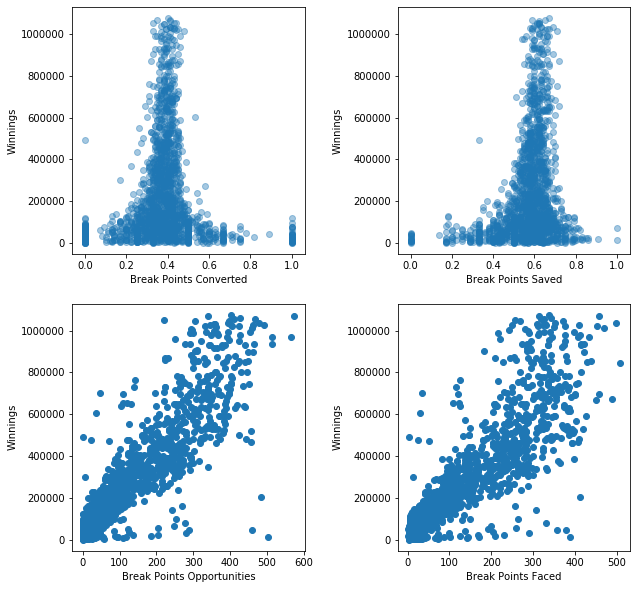

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.scatter(df.BreakPointsConverted, df.Winnings, alpha=0.4)
plt.xlabel('Break Points Converted')
plt.ylabel('Winnings')

plt.subplot(222)
plt.scatter(df.BreakPointsSaved, df.Winnings, alpha=0.4)
plt.xlabel('Break Points Saved')
plt.ylabel('Winnings')

plt.subplot(223)
plt.scatter(df.BreakPointsOpportunities, df.Winnings)
plt.xlabel('Break Points Opportunities')
plt.ylabel('Winnings')

plt.subplot(224)
plt.scatter(df.BreakPointsFaced, df.Winnings)
plt.xlabel('Break Points Faced')
plt.ylabel('Winnings')

plt.subplots_adjust(wspace=0.4)
plt.show()

In [21]:
break_points_opportunities = np.array(df.BreakPointsOpportunities).reshape(-1,1)
break_points_faced = np.array(df.BreakPointsFaced).reshape(-1,1)
winnings = np.array(df.Winnings).reshape(-1,1)
bp_predict = [[i] for i in range(0,600)]

bpo_lr = LinearRegression()
bpo_lr.fit(break_points_opportunities, winnings)
bpo_predict = bpo_lr.predict(bp_predict)

bpf_lr = LinearRegression()
bpf_lr.fit(break_points_faced, winnings)
bpf_predict = bpf_lr.predict(bp_predict)

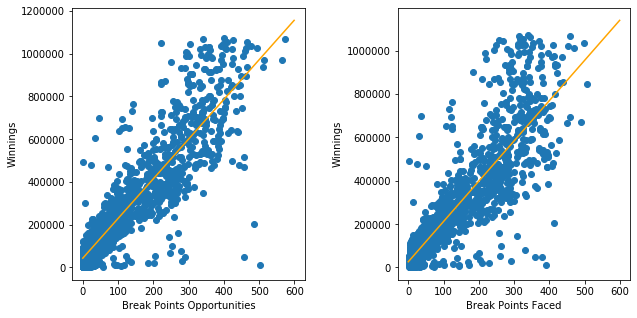

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.scatter(df.BreakPointsOpportunities, df.Winnings)
plt.plot(bp_predict, bpo_predict, color='orange')
plt.xlabel('Break Points Opportunities')
plt.ylabel('Winnings')

plt.subplot(122)
plt.scatter(df.BreakPointsFaced, df.Winnings)
plt.plot(bp_predict, bpf_predict, color='orange')
plt.xlabel('Break Points Faced')
plt.ylabel('Winnings')

plt.subplots_adjust(wspace=0.4)
plt.show()

Okay, so there is definitely a plottable trend between both break points faced and opportunities and winnings. What is the difference?

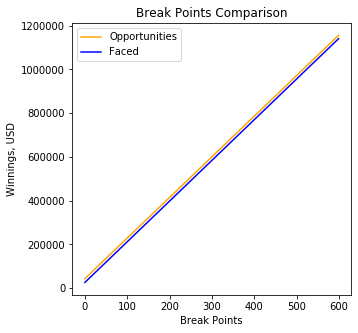

[[17185.59199861]
 [15448.27086461]]


In [23]:
plt.figure(figsize=(5,5))
plt.plot(bp_predict, bpo_predict, color='orange')
plt.plot(bp_predict, bpf_predict, color='blue')
plt.legend(labels=['Opportunities', 'Faced'])
plt.title('Break Points Comparison')
plt.xlabel('Break Points')
plt.ylabel('Winnings, USD')
plt.show()

print(bpo_lr.predict([[1],[600]]) - bpf_lr.predict([[1],[600]]))

Although Break Points Faced stopped showing data around 500 break points, making it appear on the original graphs that a higher number of break point opportunities yeilded more winnings than break points faced, a further examination of the line of best fit for both sets of data suggests that the difference is only roughly 15,500 to 17,000 USD.

From this data, a prospective tennis player could assume that it is more profitable to play primarily defensive games if they are only playing a few, but that it becomes less important the more that a player plays.

# Do first serves generally affect the outcome of games?

We'll first compare first serve points won with service games won and first serve return points won with return games won.

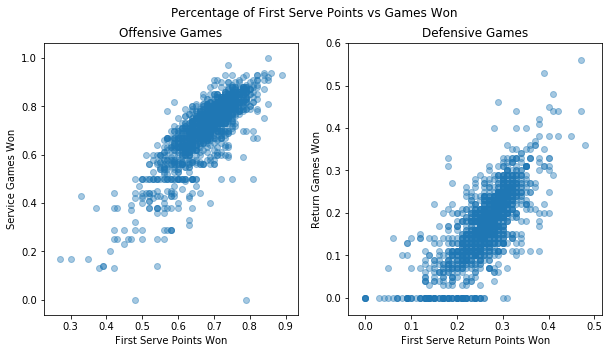

In [24]:
plt.figure(figsize=(10,5))
plt.suptitle('Percentage of First Serve Points vs Games Won')

plt.subplot(121)
plt.scatter(df['FirstServePointsWon'], df['ServiceGamesWon'], alpha=0.4)
plt.title('Offensive Games')
plt.xlabel('First Serve Points Won')
plt.ylabel('Service Games Won')

plt.subplot(122)
plt.scatter(df['FirstServeReturnPointsWon'], df['ReturnGamesWon'], alpha=0.4)
plt.title('Defensive Games')
plt.xlabel('First Serve Return Points Won')
plt.ylabel('Return Games Won')

plt.show()

Wow! There is certainly a correlation between serve points won and games won. It also seems like tennis players are more likely to win on their home turf. I'll look into that later. For now, I'd like to go down the rabbit hole of how first serve points affect wins and, ultimately, player ranking and winnings.

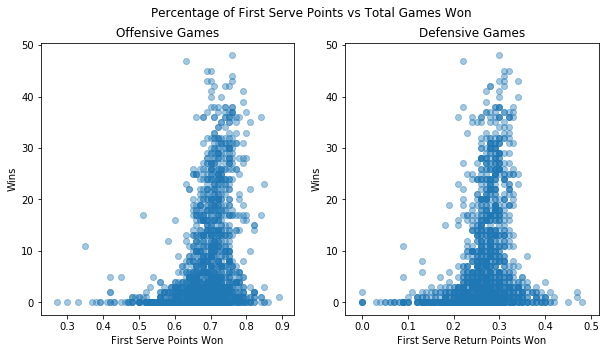

In [25]:
plt.figure(figsize=(10,5))
plt.suptitle('Percentage of First Serve Points vs Total Games Won')

plt.subplot(121)
plt.scatter(df['FirstServePointsWon'], df['Wins'], alpha=0.4)
plt.title('Offensive Games')
plt.xlabel('First Serve Points Won')
plt.ylabel('Wins')

plt.subplot(122)
plt.scatter(df['FirstServeReturnPointsWon'], df['Wins'], alpha=0.4)
plt.title('Defensive Games')
plt.xlabel('First Serve Return Points Won')
plt.ylabel('Wins')

plt.show()

This data tells me that a player is much more likely to win more games if they earn around 70% of first serve points and 30% of first serve return points. It makes sense having looked at the previous graphs-- both of these percentages are around the top right of each grouping of data, suggesting that:
- Fewer players go above these percentages.
- 70% and 30% correlate with the highest percentages of service and return games won, respectively.

Could this grouping be affected by varying numbers of games played? Let's revisit the histogram of total games per player.

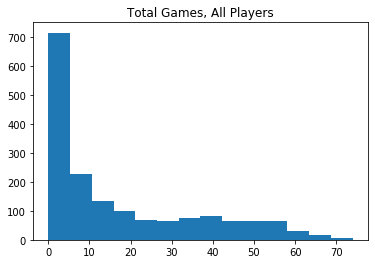

In [26]:
plt.hist(games_count_df['Total'], bins=14)
plt.title('Total Games, All Players')
plt.show()

As we can see, the vast majority of tennis players recorded played five or fewer games, but holy cow! We have some that played more than 70! This kind of variance could absolutely affect a graph comparing percentages of points earned versus total games won. What if we add a "Percent Won" column and do a comparison?

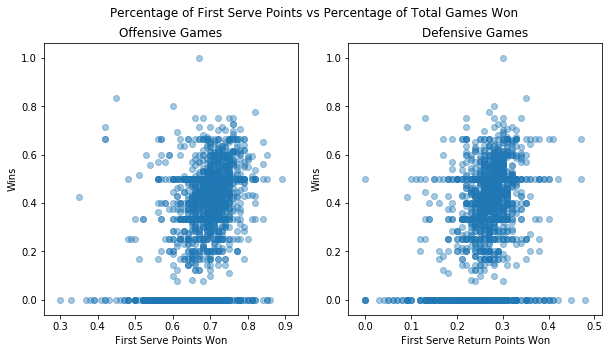

In [27]:
df['PercentWon'] = df['Wins'] / (df['Wins'] + df['Losses'])

plt.figure(figsize=(10,5))
plt.suptitle('Percentage of First Serve Points vs Percentage of Total Games Won')

plt.subplot(121)
plt.scatter(df['FirstServePointsWon'], df['PercentWon'], alpha=0.4)
plt.title('Offensive Games')
plt.xlabel('First Serve Points Won')
plt.ylabel('Wins')

plt.subplot(122)
plt.scatter(df['FirstServeReturnPointsWon'], df['PercentWon'], alpha=0.4)
plt.title('Defensive Games')
plt.xlabel('First Serve Return Points Won')
plt.ylabel('Wins')

plt.show()

Much of the data is centered around 60%-80% and 20%-35%, respectively. How will it look zoomed in?

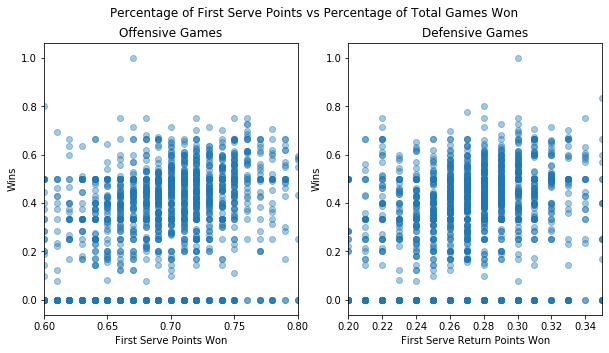

In [28]:
plt.figure(figsize=(10,5))
plt.suptitle('Percentage of First Serve Points vs Percentage of Total Games Won')

plt.subplot(121)
plt.scatter(df['FirstServePointsWon'], df['PercentWon'], alpha=0.4)
plt.title('Offensive Games')
plt.xlabel('First Serve Points Won')
plt.ylabel('Wins')
plt.xlim(0.6,0.8)

plt.subplot(122)
plt.scatter(df['FirstServeReturnPointsWon'], df['PercentWon'], alpha=0.4)
plt.title('Defensive Games')
plt.xlabel('First Serve Return Points Won')
plt.ylabel('Wins')
plt.xlim(0.2,0.35)

plt.show()

There's definitely an upward trend in both graphs, although it appears stronger for offensive games. Let's do one more visualization before moving forward with this data.

In [29]:
first_serve_points = np.array(df['FirstServePointsWon'].fillna(0)).reshape(-1,1)
first_serve_return = np.array(df['FirstServeReturnPointsWon'].fillna(0)).reshape(-1,1)
percent_won = np.array(df['PercentWon'].fillna(0)).reshape(-1,1)

firstserve_lr = LinearRegression()
firstserve_lr.fit(first_serve_points, percent_won)
firstserve_predict = firstserve_lr.predict(first_serve_points)

firstreturn_lr = LinearRegression()
firstreturn_lr.fit(first_serve_return, percent_won)
firstreturn_predict = firstreturn_lr.predict(first_serve_return)

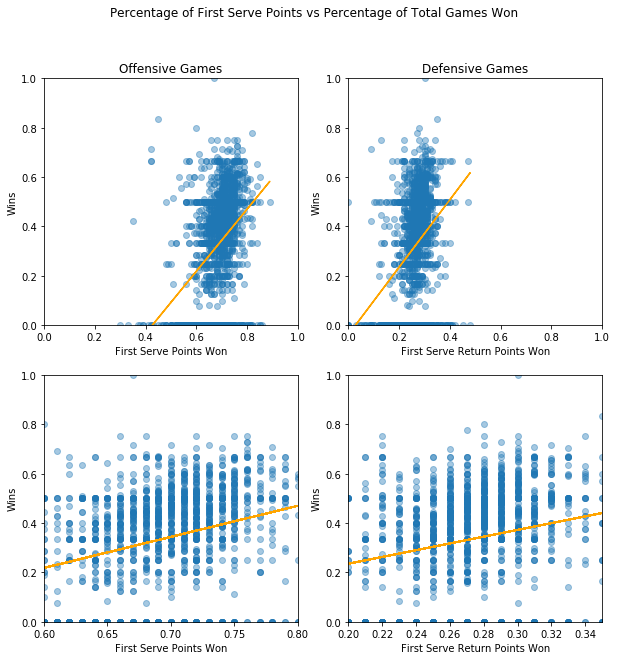

In [30]:
plt.figure(figsize=(10,10))
plt.suptitle('Percentage of First Serve Points vs Percentage of Total Games Won')

plt.subplot(221)
plt.scatter(df['FirstServePointsWon'], df['PercentWon'], alpha=0.4)
plt.plot(first_serve_points, firstserve_predict, color='orange')
plt.title('Offensive Games')
plt.xlabel('First Serve Points Won')
plt.ylabel('Wins')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(222)
plt.scatter(df['FirstServeReturnPointsWon'], df['PercentWon'], alpha=0.4)
plt.plot(first_serve_return, firstreturn_predict, color='orange')
plt.title('Defensive Games')
plt.xlabel('First Serve Return Points Won')
plt.ylabel('Wins')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(223)
plt.scatter(df['FirstServePointsWon'], df['PercentWon'], alpha=0.4)
plt.plot(first_serve_points, firstserve_predict, color='orange')
plt.xlabel('First Serve Points Won')
plt.ylabel('Wins')
plt.xlim(0.6,0.8)
plt.ylim(0,1)

plt.subplot(224)
plt.scatter(df['FirstServeReturnPointsWon'], df['PercentWon'], alpha=0.4)
plt.plot(first_serve_return, firstreturn_predict, color='orange')
plt.xlabel('First Serve Return Points Won')
plt.ylabel('Wins')
plt.xlim(0.2,0.35)
plt.ylim(0,1)


plt.show()

The graphs look like they have a similar slope, just with different y-intercepts to account for a higher percentage of first serve points one versus first serve return points won.

I notice that many of my datapoints are zero or NaN. Looking at the lower two graphs, I can tell that these zero points bring down the lines of best fit. What is the percentage of players without wins?

In [31]:
zero_wins = df[df['PercentWon'].fillna(0) == 0].PercentWon.count()
total_entries = df.Player.count()
percent_no_wins = zero_wins / total_entries * 100
print(percent_no_wins)

22.370714700755375


Nearly a quarter of players lost every game they played. What's their deal?

[   4   12   16   17   19   22   23   26   27   38   39   43   50   51
   52   55   56   60   63   65   72   73   75   78   79   80   83   86
   87   91   93   99  100  101  102  103  105  107  109  110  115  116
  118  119  124  125  128  130  131  132  136  137  138  140  142  145
  146  151  155  156  157  159  160  161  163  164  165  167  168  169
  170  172  173  174  176  178  180  183  192  194  195  196  199  200
  207  218  219  220  222  223  226  227  228  229  230  232  234  235
  238  239  241  242  245  247  249  251  253  256  257  264  265  267
  268  270  272  274  277  278  281  284  288  289  290  291  292  295
  297  299  301  303  304  308  309  310  313  314  315  317  318  319
  320  323  324  325  328  330  333  334  336  340  349  350  352  354
  355  357  364  366  370  371  377  381  385  388  398  399  400  404
  407  408  410  411  413  418  420  426  431  432  433  444  448  451
  452  459  464  465  466  474  476  477  481  486  489  495  497  509
  517 

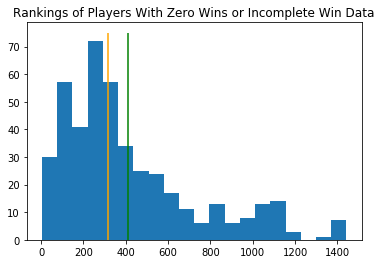

In [32]:
zero_win_rankings = df[df['PercentWon'].fillna(0) == 0].Ranking.sort_values().reset_index()
median_zero_win = zero_win_rankings.Ranking.median()
mean_zero_win = zero_win_rankings.Ranking.mean()

print(zero_win_rankings.Ranking.unique())

plt.hist(zero_win_rankings.Ranking, bins=20)
plt.vlines(x=[median_zero_win, mean_zero_win], ymin=0, ymax=75, colors=['orange', 'green'])
plt.title('Rankings of Players With Zero Wins or Incomplete Win Data')
plt.show()

I'm surprised. I expected the histogram to skew right and show that most zero-win players were ranked poorly. Do I just have more data for higher rankings? Let's check.

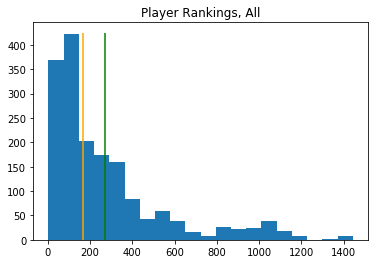

In [33]:
mean_rankings = df.Ranking.mean()
median_rankings = df.Ranking.median()

plt.hist(df.Ranking, bins=20)
plt.vlines(x=[median_rankings, mean_rankings], ymin=0, ymax=425, colors=['orange', 'green'])
plt.title('Player Rankings, All')
plt.show()

Well, that explains it. My data does not include as many poorly ranked players. I do see that zero-win players are most likely to be ranked around 300-400, while all players--regardless of wins-- are more likely to be ranked between 150-250. So what are the median and average rankings for each dataset?

In [34]:
print(f'Players with zero wins or incomplete win data have a median ranking of {str(round(median_zero_win,0))}\
 and a mean ranking of {str(round(mean_zero_win,0))}.')
print(f'All players, regardless of wins, have a median ranking of {str(round(median_rankings,0))}\
 and a mean ranking of {str(round(mean_rankings,0))}.')

Players with zero wins or incomplete win data have a median ranking of 315.0 and a mean ranking of 413.0.
All players, regardless of wins, have a median ranking of 166.0 and a mean ranking of 270.0.


With that in mind, we can assume the obvious that players who win games are more likely to have significantly better rankings (by about 150 positions!). Because first serve points, both service and return, affect the likelihood that a player wins a percentage of their matches, we can deduce that these points are essential when it comes to climbing the ranks of professional tennis players. Better work on that serve!

# Predicting winnings with several parameters

So we know that winnings are affected by year, ranking, break points, and first serves. What if we take all of these into account to predict a player's winnings?

Train score:
0.841692059342017
Test score:
0.8358104727148079


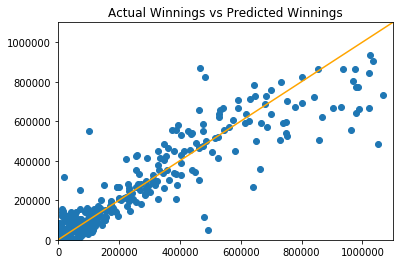

In [35]:
x = df[['Year',
        'Ranking',
        'BreakPointsOpportunities',
        'BreakPointsFaced',
        'FirstServePointsWon',
        'FirstServeReturnPointsWon']]

y = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(1100000), range(1100000), color='orange')
plt.title('Actual Winnings vs Predicted Winnings')
plt.ylim(0,1100000)
plt.xlim(0,1100000)
plt.show()

This is good! The model tends to predict lower than the orignal data at higher values, but we did notice that our higher earning tennis players tended to be outliers in many other categories. Let's see how I, a complete novice, would fare.

We'll start by finding out the worst listed ranking.

In [36]:
worst_ranking = df.sort_values(by='Ranking', ascending=False).reset_index()

worst_ranking.head()

,index,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,...,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking,PercentWon
0,290,Rhyne Williams,2014,0.65,0.72,0.20,0.46,0.45,55,0.54,...,0.32,73,0.78,0.48,0.63,0,0,3787,1443,NaN
1,1119,Rhyne Williams,2013,0.58,0.72,0.22,0.49,0.51,143,0.33,...,0.33,210,0.75,0.48,0.62,3,1,15058,1443,0.75
2,552,Rhyne Williams,2015,0.62,0.65,0.21,0.26,0.30,3,0.00,...,0.25,8,0.50,0.38,0.50,0,0,1992,1443,NaN
3,963,Rhyne Williams,2012,0.59,0.76,0.18,0.50,0.52,16,0.13,...,0.29,29,0.79,0.46,0.65,0,0,7670,1443,NaN
4,421,Matteo Trevisan,2015,0.63,0.64,0.35,0.44,0.53,1,0.44,...,0.42,14,0.64,0.50,0.56,0,1,12044,1429,0.00


Oh, man, Rhyne Williams. You had a rough go of it, didn't you? I'm going to position myself below them at rank 1444.

The year is 2020, but we're in the middle of Covid, so I'm going to be optimistic and hope that we'll have a vaccine by next year. 

For the other fields, let's pretend I'll spend the next year practicing my serve against my toddler, who-- based on my athletic aptitude-- will undoubtedly cream me in every way. Still, maybe I'll get lucky come 2021. I'll play just a few offensive games because I don't have a stadium of my own.

- Year = 2021
- Ranking = 1444
- BreakPointsOpportunities = 0
- BreakPointsFaced = 6
- FirstServePointsWon = 0.16
- FirstServeReturnPointsWon = 0

In [38]:
mary_test = [[2021, 1444, 0, 6, 0.16, 0]]

mary_predict = lm.predict(mary_test)
print(mary_predict[0][0])

4576.228333130479


You know, that isn't as bad as I expected. I was sure the model would have me in the negative. Granted, after time spent practicing, entry fees, and equipment costs...

Maybe I'm better off sticking to data science.